<a href="https://colab.research.google.com/github/tongza331/CPE393_Coding_in_Ai/blob/main/62_7208_Lab4_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab3 - Introduction to Deep Neural Network
- Patcharaporn Sirimom, 62070507208

Name your file to 60_7208.ipynb

## Lab Instruction 

In this lab, you will learn how to build a simple fully-connected neural network with Keras and Tensorflow as the backend. We will experiment with MNIST data, which is a Keras built-in dataset.

There are three questions to answer in this lab.

See http://yann.lecun.com/exdb/mnist/ for data description.

First, import all of the libraries that will be used in this lab.

In [ ]:
import keras
import numpy as np

In [ ]:
from keras.datasets import mnist

### Load Data ###
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
#################

11501568/11490434 [==============================] - 0s 0us/step


### 1. Learn About the Data

Understand your data, such as its shape, format, datatype, structure, distribution, data classes, and so on.

In [ ]:
# Class
print('Feature Type: %s' %type(train_images))
print('Label Type: %s' %type(train_labels))

Feature Type: <class 'numpy.ndarray'>
Label Type: <class 'numpy.ndarray'>


In [ ]:
# Type
print('Feature data type: %s'%train_images.dtype)
print('Label data type: %s'%train_labels.dtype)

Feature data type: uint8
Label data type: uint8


In [ ]:
# Shape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [ ]:
# Dimension
print('Train_set Feature dimension: %s'%str(train_images.ndim))
print('Train_set Label dimension: %s'%str(train_labels.ndim))
print('Test_set Feature dimension: %s'%str(test_images.ndim))
print('Test_set Label dimension: %s'%str(test_labels.ndim))

Train_set Feature dimension: 3
Train_set Label dimension: 1
Test_set Feature dimension: 3
Test_set Label dimension: 1


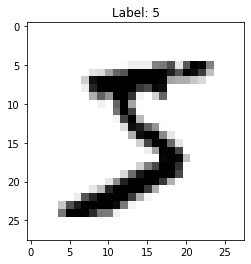

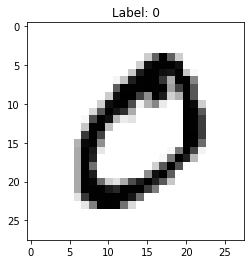

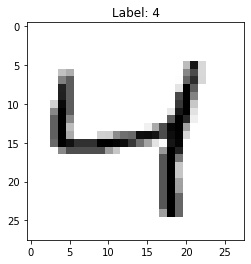

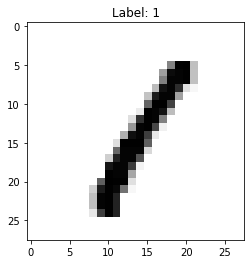

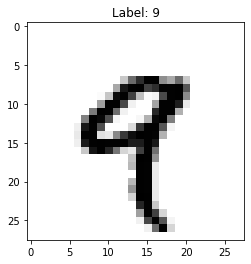

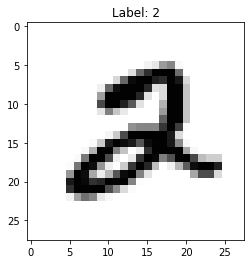

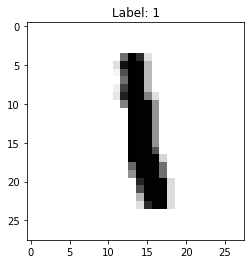

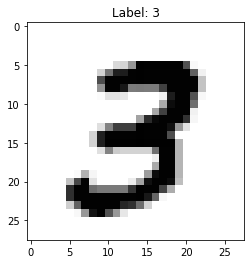

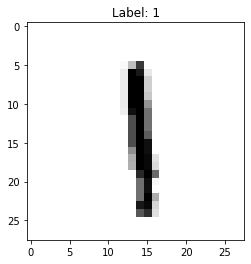

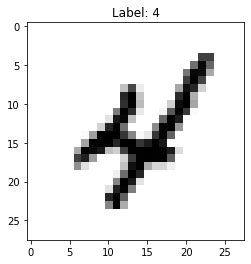

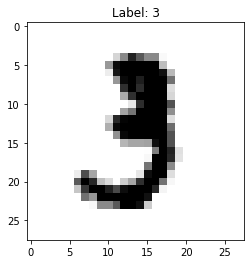

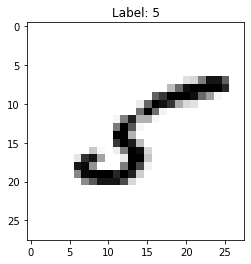

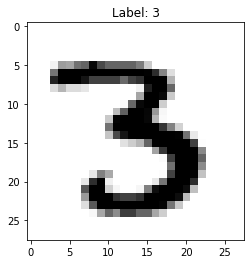

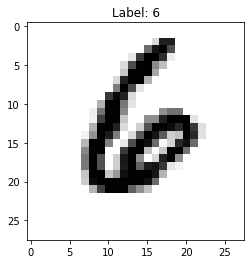

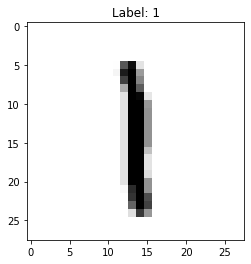

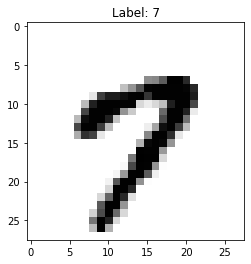

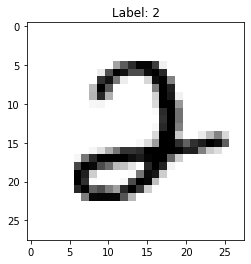

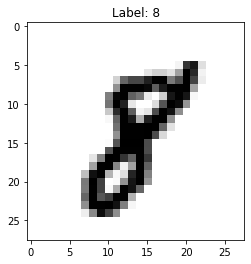

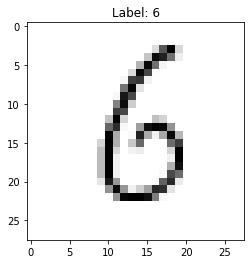

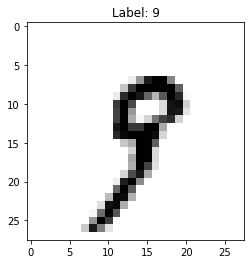

In [ ]:
from matplotlib import figure
import matplotlib.pyplot as plt
%matplotlib inline

for i in range(20):
  plt.title('Label: %s' %train_labels[i])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.show()

### 2. Build Neural Network Model

Build a two-layer neural network (except for the input and output layers) using `Sequential()`
( See https://keras.io/models/sequential ) 
> INPUT -> LINEAR -> RELU -> LINEAR -> SIGMOID

with the hidden layer of size 512.

See Keras Model: https://keras.io/models/about-keras-models/

In [ ]:
from keras import models
from keras import layers

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10, activation='sigmoid'))

Compile your model with the following argument.

```
optimizer='sgd',
loss='categorical_crossentropy',
metrics=['accuracy']
```

In [ ]:
network.compile(optimizer='sgd',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

Let's see how our model looks using `.summary()`

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


### 3. Preprocessing

- Reshape (flatten) the features data and normalize the value to be between 0 and 1
- One-hot the target data

In [ ]:
# Shape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 28, 28)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 28, 28)
Test_set Label type: (10000,)


In [ ]:
# Reshape and Normalize
train_images = train_images.reshape(60000, 28*28)
train_images = train_images.astype('float32')/255

test_images = test_images.reshape(10000, 28*28)
test_images = test_images.astype('float32')/255

In [ ]:
# After reshape
print('Train_set Feature shape: %s'%str(train_images.shape))
print('Train_set Label type: %s'%str(train_labels.shape))
print('Test_set Feature shape: %s'%str(test_images.shape))
print('Test_set Label type: %s'%str(test_labels.shape))

Train_set Feature shape: (60000, 784)
Train_set Label type: (60000,)
Test_set Feature shape: (10000, 784)
Test_set Label type: (10000,)


In [ ]:
import tensorflow 
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
test_labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
test_labels.shape

(10000, 10)

### 4. Model Training 

Use `.fit()` to train your neural network model and return a record of accuracy and loss values for each epoch.

We will train the model for 10 epochs (If you are confident in your computer's performance, you can train the model with more epochs.)

We will train using the mini-batch method, with each batch containing 128 data points.

To avoid overfitting with the test set, we will split the current training data into 90% for training and 10% for validating the model.

This will take approximately one minute.

We will plot the loss and accuracy of both the train and validate sets over iterations.

In [ ]:
history = network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)

Epoch 1/10
422/422 [==============================] - 3s 5ms/step - loss: 1.1657 - accuracy: 0.7365 - val_loss: 0.5967 - val_accuracy: 0.8852
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5599 - accuracy: 0.8655 - val_loss: 0.4089 - val_accuracy: 0.9057
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.4463 - accuracy: 0.8841 - val_loss: 0.3440 - val_accuracy: 0.9142
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3948 - accuracy: 0.8942 - val_loss: 0.3097 - val_accuracy: 0.9218
Epoch 5/10
422/422 [==============================] - 2s 4ms/step - loss: 0.3634 - accuracy: 0.9009 - val_loss: 0.2876 - val_accuracy: 0.9253
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3414 - accuracy: 0.9056 - val_loss: 0.2722 - val_accuracy: 0.9270
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.3242 - accuracy: 0.9104 - val_loss: 0.2597 - val_accuracy: 0.9310
Epoch 

In [ ]:
import  matplotlib.pyplot  as plt
%matplotlib inline

In [ ]:
# The function argument is the model's history during the training process.
def plot_loss_fn(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(loss) + 1)

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
def plot_acc_fn(history):

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

In [ ]:
history.history

{'loss': [1.1656769514083862,
  0.5599334836006165,
  0.4463256597518921,
  0.39480146765708923,
  0.36335060000419617,
  0.34135496616363525,
  0.32423990964889526,
  0.3103882670402527,
  0.2985956370830536,
  0.28838977217674255],
 'accuracy': [0.7365370392799377,
  0.8654814958572388,
  0.8840555548667908,
  0.8941666483879089,
  0.900851845741272,
  0.9056296348571777,
  0.9103518724441528,
  0.9137222170829773,
  0.9167407155036926,
  0.9200000166893005],
 'val_loss': [0.5966789126396179,
  0.4088785946369171,
  0.34400951862335205,
  0.3097204864025116,
  0.2876439392566681,
  0.2721899151802063,
  0.2596692740917206,
  0.24934571981430054,
  0.24127642810344696,
  0.2328028827905655],
 'val_accuracy': [0.8851666450500488,
  0.9056666493415833,
  0.9141666889190674,
  0.921833336353302,
  0.9253333210945129,
  0.9269999861717224,
  0.9309999942779541,
  0.9323333501815796,
  0.934499979019165,
  0.9368333220481873]}

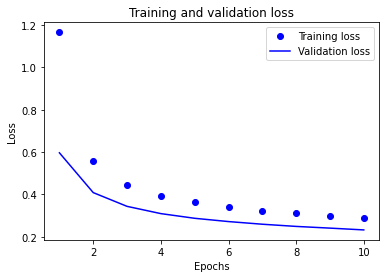

In [ ]:
plot_loss_fn(history)

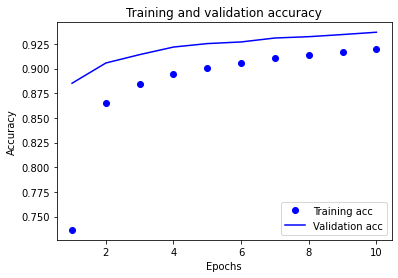

In [ ]:
plot_acc_fn(history)

Q: At which iteration does your model start to overfit? Give your rational.


**ANSWER**

เมื่อดูจากกราฟของ Loss และ Accuracy แล้วพบว่า เมื่อ epochs ยิ่งสูงจะทำให้ค่า val_loss และ val_acc ลู่เข้าสู่ค่าๆหนึ่งพร้อมกัน (เกิด gap ระหว่างเส้นของ trainning กับ validation พอดีกัน และเส้นของ val_acc สูงกว่า training_acc อีกด้วย) ซึ่งกราฟชองค่า Loss ไม่พุ่งสูงขึ้นในจุดใดจุดหนึ่งมากจนเกินไป ดังนั้น ทำให้ model นี้ ไม่มีการ overfit ของ model 

### 5. Model Evaluation

Evaluate your model with test set using `.evaluate()` and compare the results to those from the training and validate sets. Does your model overfit or underfit? How about the bias and variance?

In [ ]:
# Evaluate 
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Loss: %s\nTest Accuracy: %s' % (test_loss,test_acc))

313/313 [==============================] - 0s 1ms/step - loss: 0.2692 - accuracy: 0.9272
Test Loss: 0.2692302465438843
Test Accuracy: 0.9272000193595886


In [ ]:
# Prediction
test_pred = network.predict(test_images)

def prob_predict(test_pred, img_idx):
  img = test_images[img_idx].reshape(28,28)
  plt.imshow(img)
  prob_list = test_pred[img_idx]
  label = 0
  for prob in prob_list:
    print(label, ':', prob)
    label+=1
  print('Label is: ',prob_list.argmax())

0 : 0.16493842
1 : 0.013765246
2 : 0.008897334
3 : 0.8698698
4 : 0.9584234
5 : 0.83173
6 : 0.0018397272
7 : 0.99758875
8 : 0.78996825
9 : 0.99961984
Label is:  9


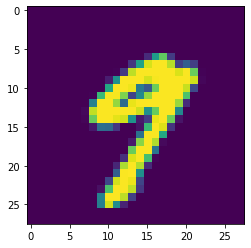

In [ ]:
prob_predict(test_pred, 20) 

0 : 0.32719997
1 : 0.009338796
2 : 0.81621903
3 : 0.05042389
4 : 0.9785951
5 : 0.5352065
6 : 0.9983472
7 : 0.31626016
8 : 0.13352317
9 : 0.36334547
Label is:  6


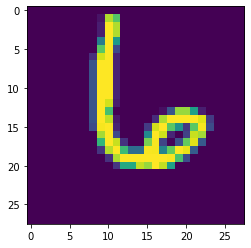

In [ ]:
prob_predict(test_pred, 156) 

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
y_labels = np.argmax(test_labels, axis=1)
y_pred = np.argmax(test_pred, axis=1)
cf_matrix = confusion_matrix(y_labels, y_pred)
print(cf_matrix)

[[ 962    0    1    2    0    4    6    1    4    0]
 [   0 1110    1    3    1    1    4    2   13    0]
 [   9    4  919   16   13    2   13   16   33    7]
 [   2    1   17  931    0   19    3   15   16    6]
 [   1    2    3    2  929    0   10    2    4   29]
 [  12    2    1   38    7  782   17    4   22    7]
 [  12    3    4    4   12   10  910    1    2    0]
 [   3   10   23    5    9    0    0  949    3   26]
 [   6    6    6   23    8   18   10   10  874   13]
 [  11    7    3   12   38    9    0   17    6  906]]


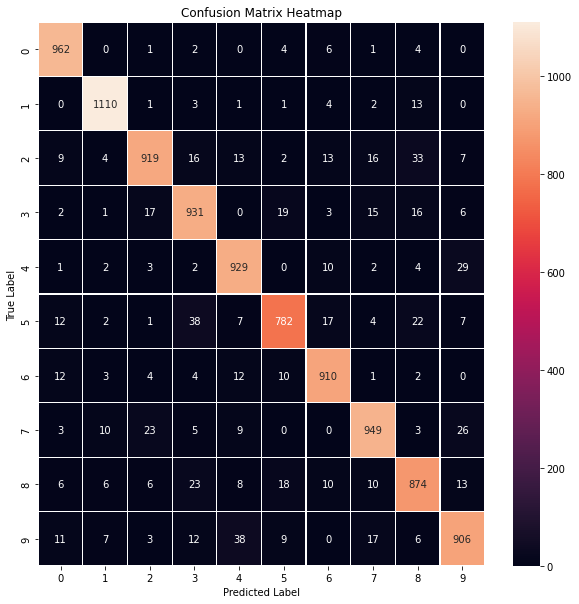

In [ ]:
import pandas as pd
import seaborn as sns

class_names = []
for i in range(10):
  class_names.append(str(i))

df_cf = pd.DataFrame(cf_matrix,class_names)
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(df_cf, annot=True, fmt='g', linewidths=.1)
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
print("\n"+ classification_report(y_labels, y_pred, target_names=class_names))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96       980
           1       0.97      0.98      0.97      1135
           2       0.94      0.89      0.91      1032
           3       0.90      0.92      0.91      1010
           4       0.91      0.95      0.93       982
           5       0.93      0.88      0.90       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.93      1028
           8       0.89      0.90      0.90       974
           9       0.91      0.90      0.90      1009

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



Q: Analyze the performance of your model using a confusion matrix. Which class does your model frequently misclassify? What is the precision and recall of your model?


**ANSWER**

จาก confus matrix พบว่าข้อมูลที่ใช้ในการ Test มีทั้งหมด 10,000 รูป โดย Model นี้ มี Accuracy 93% มี precision อยู่ที่ 93% และ recall อยู่ที่ 93% เช่นกัน 


และเมื่อพิจารณาแต่ละคลาส พิจารณาจาก ค่า recall พบว่าคลาสที่ 5 มีค่า recall เพียง 0.88 เท่านั้น นั่นหมายความว่า 
- model นี้สามารถทายเป็นเลข 5 ได้ 774 รูป จาก 892 รูป โดยส่วนใหญ่จะทายผิดไปเป็น เลข 3 มากที่สุด จำนวน 19 รูป รองลงมาคือทำนายผิดไปเป็นเลข 8 จำนวน 18 รูป


### 6. Model tuning

Try tuning your model by: 
1. Adjust the learning rate of your optimizer by increasing and decreasing the learning rate to see how it affects your model.
2. Experiment with different optimizers ('sgd', 'rmsrpop', 'adagrad', 'adam', See https://keras.io/optimizers ) to see which one converges faster.
3. Change the structure of your model by adding more hidden layers with any number of nodes, and then observe how this affects your model.

In [ ]:
def diff_optimizer(opt):
  # set model
  network = models.Sequential()
  network.add(layers.Dense(512, activation='relu', input_shape=(28*28,)))
  network.add(layers.Dense(10, activation='sigmoid'))
  # set optimizer
  network.compile(optimizer=opt,
               loss='categorical_crossentropy',
               metrics=['accuracy'])
  # model fitting
  history = network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.1)
  return history

def plot_curve(history_opt):
  # loss curves
  plt.figure(figsize=[8,6])
  loss = history_opt.history['loss']
  val_loss = history_opt.history['val_loss']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()

  # Accuracy curves
  plt.figure(figsize=[8,6])
  loss = history_opt.history['accuracy']
  val_loss = history_opt.history['val_accuracy']

  epochs = range(1, len(loss) + 1)

  plt.plot(epochs, loss, 'ro', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('accuracy')
  plt.legend()

**Adagrad optimizer**

In [ ]:
adagrad_history = diff_optimizer('Adagrad')

Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 1.7932 - accuracy: 0.5450 - val_loss: 1.3005 - val_accuracy: 0.7895
Epoch 2/10
422/422 [==============================] - 2s 5ms/step - loss: 1.1030 - accuracy: 0.7891 - val_loss: 0.8628 - val_accuracy: 0.8520
Epoch 3/10
422/422 [==============================] - 2s 5ms/step - loss: 0.8217 - accuracy: 0.8306 - val_loss: 0.6688 - val_accuracy: 0.8782
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.6837 - accuracy: 0.8500 - val_loss: 0.5638 - val_accuracy: 0.8880
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.6028 - accuracy: 0.8621 - val_loss: 0.4991 - val_accuracy: 0.8935
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5493 - accuracy: 0.8704 - val_loss: 0.4546 - val_accuracy: 0.8992
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.5111 - accuracy: 0.8766 - val_loss: 0.4225 - val_accuracy: 0.9042
Epoch 

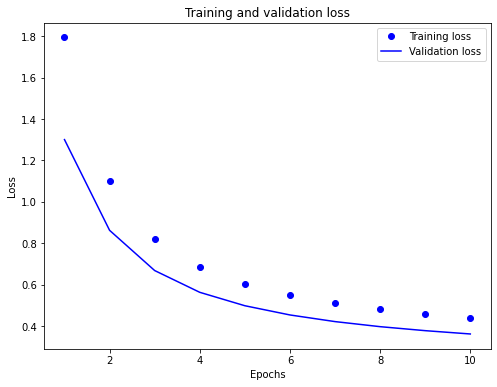

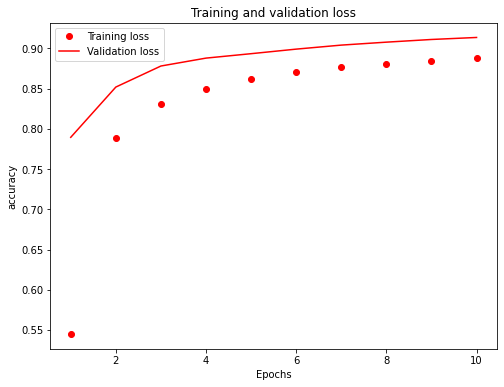

In [ ]:
plot_curve(adagrad_history)

**RMSprop optimizer**

In [ ]:
rmsrpop_history = diff_optimizer('RMSprop')

Epoch 1/10
422/422 [==============================] - 3s 6ms/step - loss: 0.2691 - accuracy: 0.9217 - val_loss: 0.1151 - val_accuracy: 0.9650
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1105 - accuracy: 0.9673 - val_loss: 0.0864 - val_accuracy: 0.9737
Epoch 3/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0725 - accuracy: 0.9781 - val_loss: 0.0793 - val_accuracy: 0.9772
Epoch 4/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0517 - accuracy: 0.9846 - val_loss: 0.0753 - val_accuracy: 0.9783
Epoch 5/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.0688 - val_accuracy: 0.9803
Epoch 6/10
422/422 [==============================] - 2s 6ms/step - loss: 0.0294 - accuracy: 0.9907 - val_loss: 0.0688 - val_accuracy: 0.9818
Epoch 7/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0230 - accuracy: 0.9933 - val_loss: 0.0741 - val_accuracy: 0.9802
Epoch 

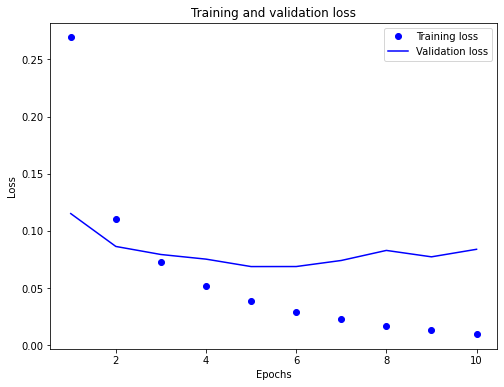

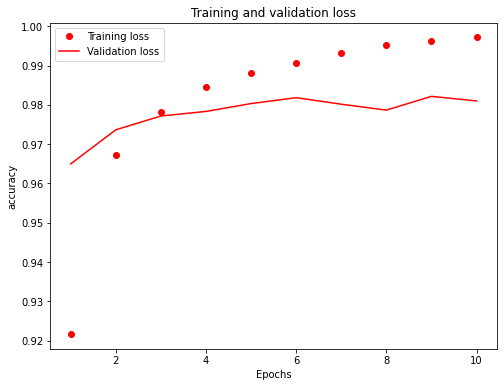

In [ ]:
plot_curve(rmsrpop_history)

**Adam optimizer**

In [ ]:
adam_history = diff_optimizer('adam')

Epoch 1/10
422/422 [==============================] - 3s 7ms/step - loss: 0.2813 - accuracy: 0.9198 - val_loss: 0.1243 - val_accuracy: 0.9620
Epoch 2/10
422/422 [==============================] - 3s 7ms/step - loss: 0.1150 - accuracy: 0.9664 - val_loss: 0.0861 - val_accuracy: 0.9753
Epoch 3/10
422/422 [==============================] - 3s 6ms/step - loss: 0.0734 - accuracy: 0.9789 - val_loss: 0.0749 - val_accuracy: 0.9785
Epoch 4/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0518 - accuracy: 0.9845 - val_loss: 0.0658 - val_accuracy: 0.9812
Epoch 5/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0383 - accuracy: 0.9889 - val_loss: 0.0691 - val_accuracy: 0.9802
Epoch 6/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0276 - accuracy: 0.9925 - val_loss: 0.0629 - val_accuracy: 0.9827
Epoch 7/10
422/422 [==============================] - 2s 5ms/step - loss: 0.0214 - accuracy: 0.9941 - val_loss: 0.0711 - val_accuracy: 0.9820
Epoch 

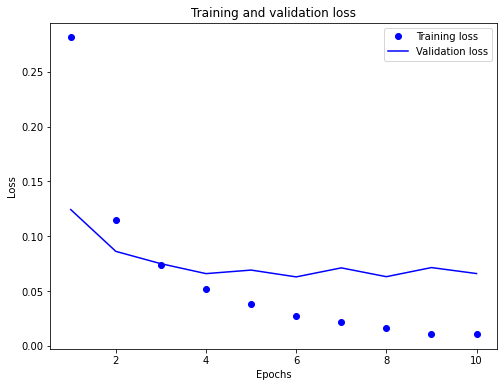

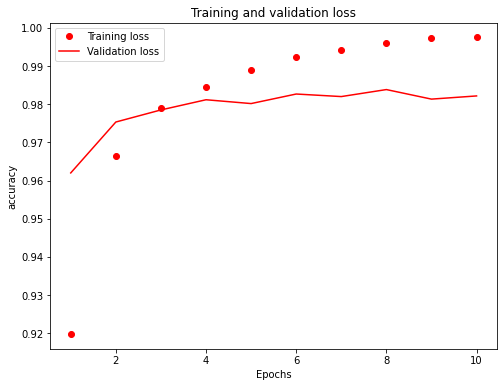

In [ ]:
plot_curve(adam_history)

**Compare the curves**
'sgd', 'rmsprop', 'adagrad', 'adam'

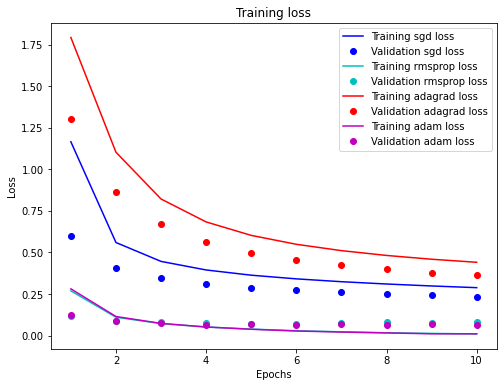

In [ ]:
## Loss
plt.figure(figsize=[8,6])

# sgd
loss_sgd = history.history['loss']
val_loss_sgd = history.history['val_loss']

# rmsprop
loss_rmsprop = rmsrpop_history.history['loss']
val_loss_rmsprop = rmsrpop_history.history['val_loss']

# adagrad
loss_adagrad = adagrad_history.history['loss']
val_loss_adagrad = adagrad_history.history['val_loss']

# adam
loss_adam = adam_history.history['loss']
val_loss_adam = adam_history.history['val_loss']

epochs_sgd = range(1, len(loss_sgd) + 1)
epochs_rmsrpop = range(1, len(loss_rmsprop) + 1)
epochs_adagrad = range(1, len(loss_adagrad) + 1)
epochs_adam = range(1, len(loss_adam) + 1)

plt.plot(epochs_sgd, loss_sgd, 'b', label='Training sgd loss')
plt.plot(epochs_sgd, val_loss_sgd, 'bo', label='Validation sgd loss')

plt.plot(epochs_rmsrpop, loss_rmsprop, 'c', label='Training rmsprop loss')
plt.plot(epochs_rmsrpop, val_loss_rmsprop, 'co', label='Validation rmsprop loss')

plt.plot(epochs_adagrad, loss_adagrad, 'r', label='Training adagrad loss')
plt.plot(epochs_adagrad, val_loss_adagrad, 'ro', label='Validation adagrad loss')

plt.plot(epochs_adam, loss_adam, 'm', label='Training adam loss')
plt.plot(epochs_adam, val_loss_adam, 'mo', label='Validation adam loss')

plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

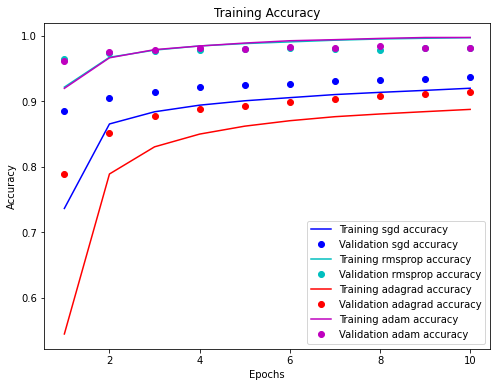

In [ ]:
## Accuracy
plt.figure(figsize=[8,6])

# sgd
acc_sgd = history.history['accuracy']
val_acc_sgd = history.history['val_accuracy']

# rmsprop
acc_rmsprop = rmsrpop_history.history['accuracy']
val_acc_rmsprop = rmsrpop_history.history['val_accuracy']

# adagrad
acc_adagrad = adagrad_history.history['accuracy']
val_acc_adagrad = adagrad_history.history['val_accuracy']

# adam
acc_adam = adam_history.history['accuracy']
val_acc_adam = adam_history.history['val_accuracy']

epochs_sgd = range(1, len(acc_sgd) + 1)
epochs_rmsrpop = range(1, len(acc_rmsprop) + 1)
epochs_adagrad = range(1, len(acc_adagrad) + 1)
epochs_adam = range(1, len(acc_adam) + 1)

plt.plot(epochs_sgd, acc_sgd, 'b', label='Training sgd accuracy')
plt.plot(epochs_sgd, val_acc_sgd, 'bo', label='Validation sgd accuracy')

plt.plot(epochs_rmsrpop, acc_rmsprop, 'c', label='Training rmsprop accuracy')
plt.plot(epochs_rmsrpop, val_acc_rmsprop, 'co', label='Validation rmsprop accuracy')

plt.plot(epochs_adagrad, acc_adagrad, 'r', label='Training adagrad accuracy')
plt.plot(epochs_adagrad, val_acc_adagrad, 'ro', label='Validation adagrad accuracy')

plt.plot(epochs_adam, acc_adam, 'm', label='Training adam accuracy')
plt.plot(epochs_adam, val_acc_adam, 'mo', label='Validation adam accuracy')

plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### 7. Discussion and Result
Q: Write down your findings from the previous step.

**ANSWER**

- จากการทำ Lab นี้พบว่า การทำโมเดลสำหรับ Neural Network สำคัญที่ขั้นตอน Data Preprocessing และการเลือกใช้ opimizer เพราะ optimizer แต่ละตัวสามารถลด Loss ด้วยความเร็วและประสิทธิภาพที่ไม่เท่ากัน 

- ผลจากการเปรียบเทียบ opitmizer แต่ละตัวพบว่าการเทรนโมเดลด้วย adam สามารถลด loss ได้มากที่สุด ซึ่งเป็นตัว optimizer ที่เอาข้อดีจาก rmsprop และ momentum รวมเข้าไว้ด้วยกัน
